<a href="https://colab.research.google.com/github/Tanishqchahal/EV_market-size_analysis/blob/main/EV_market_size_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit

In [2]:
sns.set_style('whitegrid')

In [5]:
ev_data = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [6]:
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [7]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [8]:
ev_data.isna().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [9]:
ev_data = ev_data.dropna()

##EV Adoption Over Time

In [10]:
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
ev_adoption_by_year

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

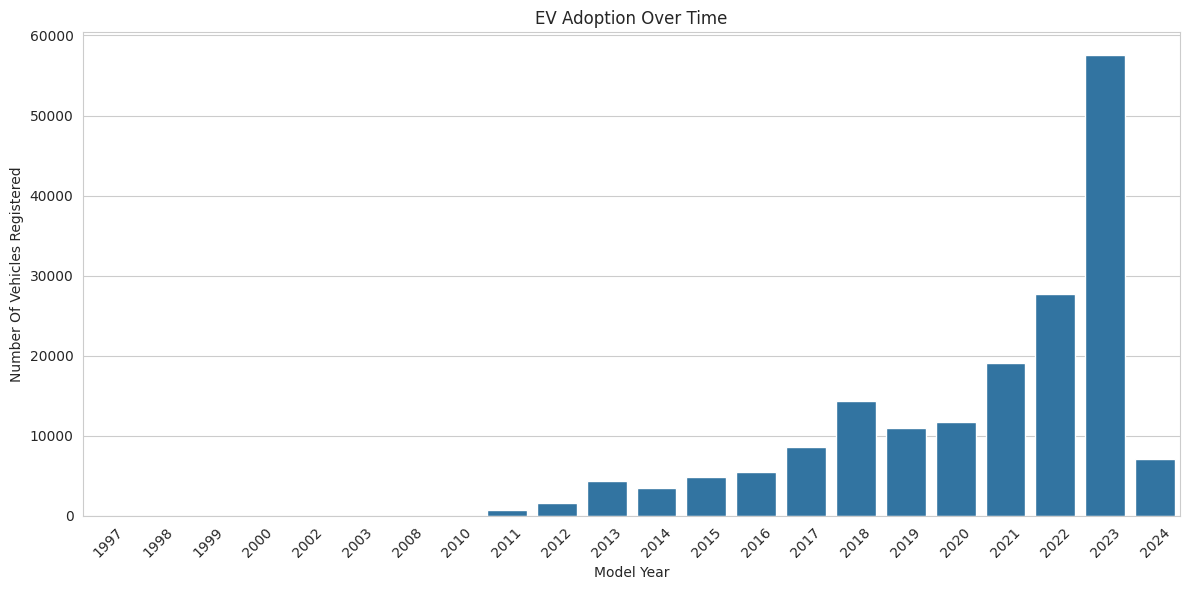

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values)
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number Of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Geographical Distribution

In [12]:
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index


In [13]:
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]
# top_counties_data
city_wise_distribution = top_counties_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number Of Vehicles')
city_wise_distribution

,County,City,Number Of Vehicles
0,King,Seattle,29447
1,King,Bellevue,8930
2,King,Redmond,6478
3,King,Kirkland,5362
4,King,Sammamish,5280
...,...,...,...
108,Snohomish,Alderwood Manor,1
109,Snohomish,Startup,1
110,King,Gold Bar,1
111,Pierce,Kapowsin,1


In [14]:
top_cities = city_wise_distribution.head(10)
top_cities

,County,City,Number Of Vehicles
0,King,Seattle,29447
1,King,Bellevue,8930
2,King,Redmond,6478
3,King,Kirkland,5362
4,King,Sammamish,5280
5,King,Renton,4980
6,Snohomish,Bothell,4663
7,Pierce,Tacoma,3722
8,King,Tukwila,2927
9,King,Kent,2782


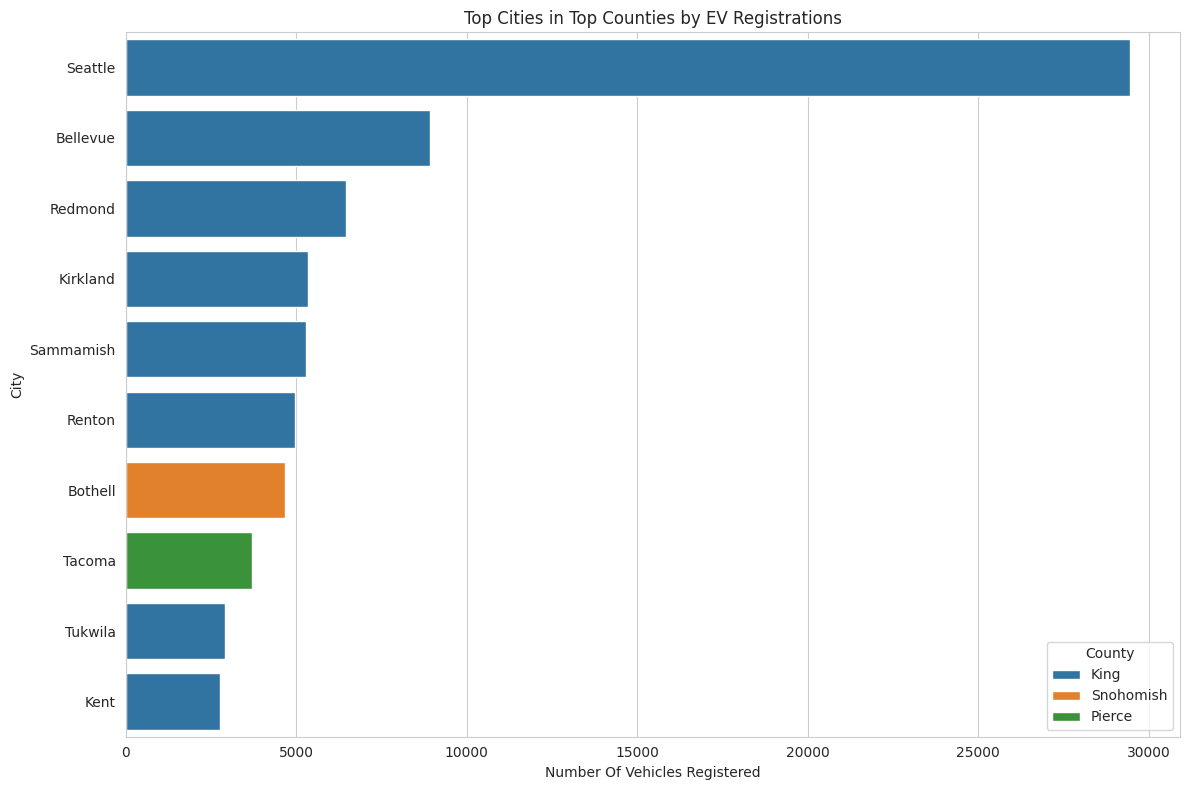

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(data=top_cities,x='Number Of Vehicles',y='City',hue='County')
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number Of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

##EV Types Distribution

In [16]:
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()


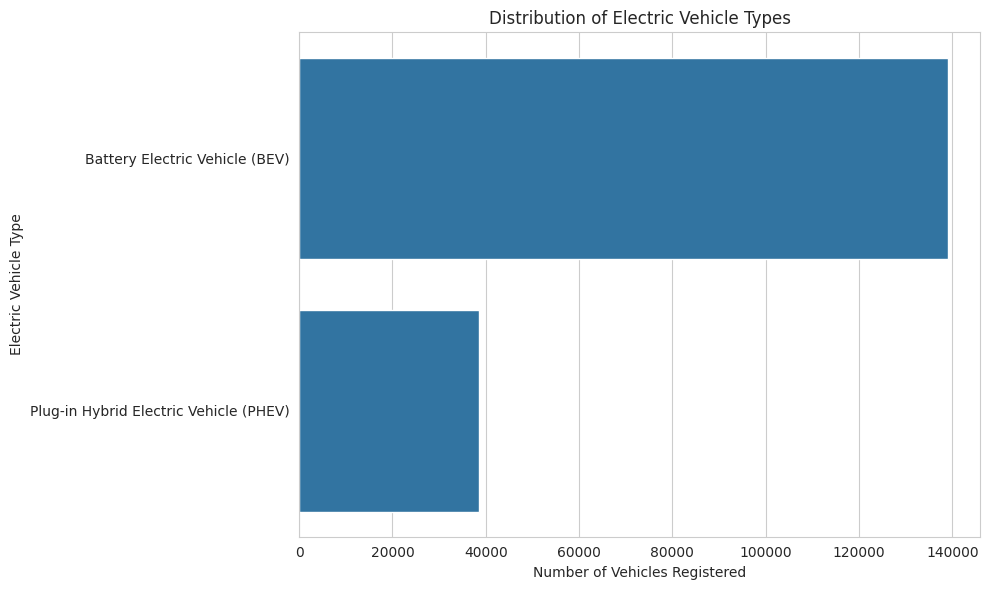

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x=ev_type_distribution.values,y=ev_type_distribution.index)
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

##EV Manufacturer Popularity

In [18]:
ev_make_distribution = ev_data['Make'].value_counts().head(10)
ev_make_distribution

Make
TESLA         79471
NISSAN        13984
CHEVROLET     13651
FORD           9177
BMW            7556
KIA            7423
TOYOTA         6254
VOLKSWAGEN     4993
JEEP           4468
HYUNDAI        4398
Name: count, dtype: int64

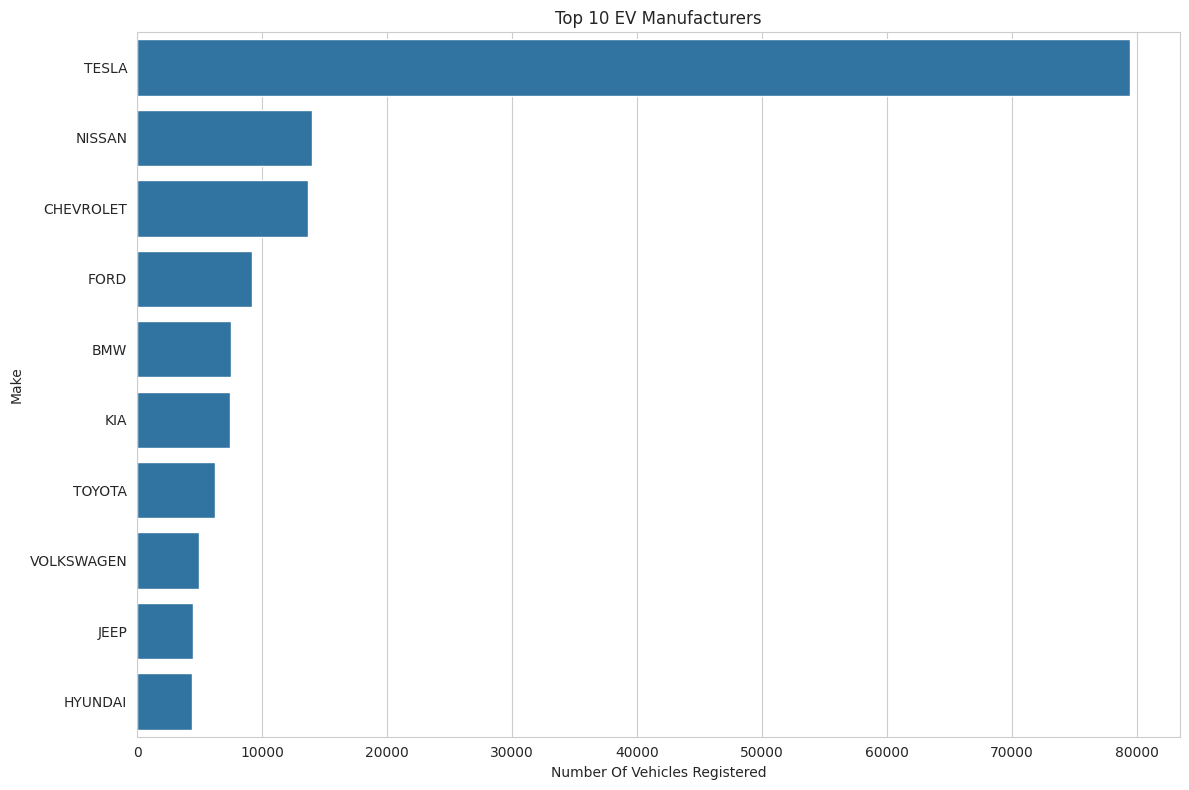

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index)
plt.title('Top 10 EV Manufacturers')
plt.xlabel('Number Of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

In [20]:
top_3_makes = ev_make_distribution.head(3).index
top_3_makes

Index(['TESLA', 'NISSAN', 'CHEVROLET'], dtype='object', name='Make')

In [21]:
top_3_data = ev_data[ev_data['Make'].isin(top_3_makes)]

In [22]:
model_wise_distribution = top_3_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number Of Vehicles')
# model_wise_distribution
top_models = model_wise_distribution.head(10)
top_models

,Make,Model,Number Of Vehicles
0,TESLA,MODEL Y,35921
1,TESLA,MODEL 3,30009
2,NISSAN,LEAF,13352
3,TESLA,MODEL S,7711
4,CHEVROLET,BOLT EV,6811
5,TESLA,MODEL X,5784
6,CHEVROLET,VOLT,4782
7,CHEVROLET,BOLT EUV,1770
8,NISSAN,ARIYA,632
9,CHEVROLET,SPARK,240


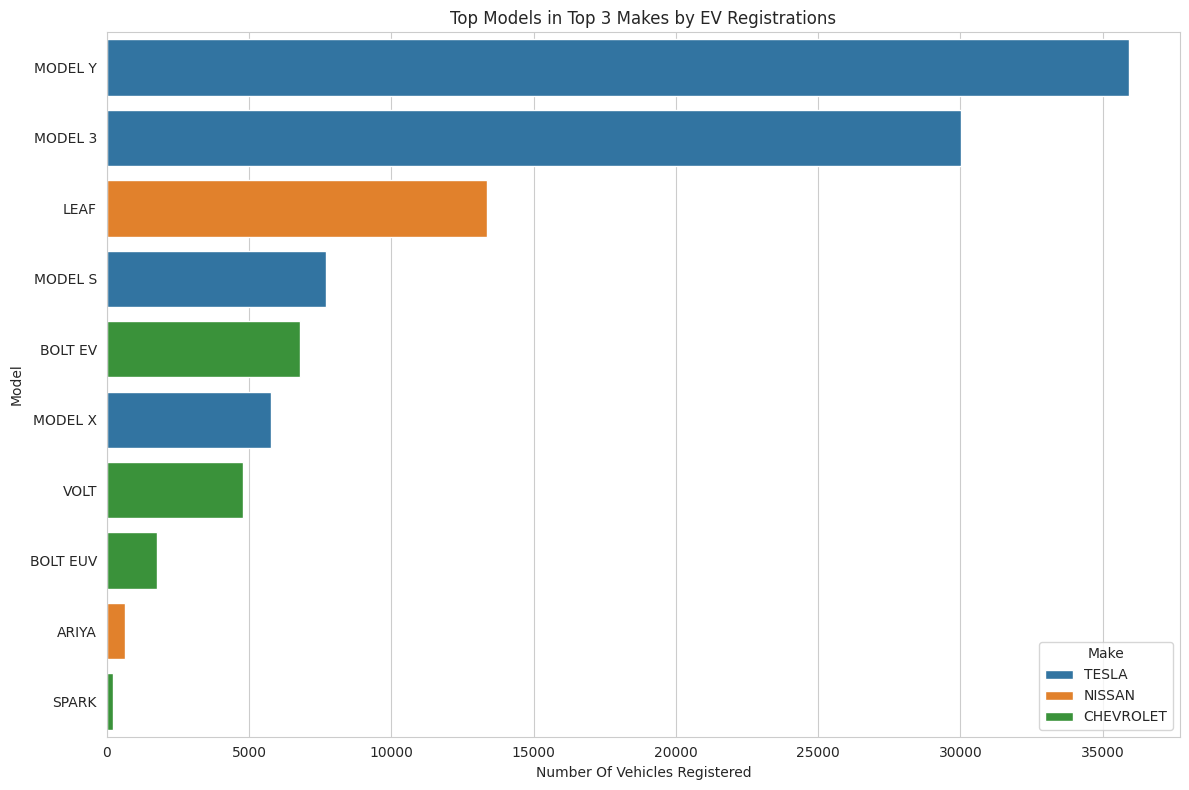

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(data = top_models, x='Number Of Vehicles',y='Model',hue='Make')
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number Of Vehicles Registered')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

##EV Range Distribution

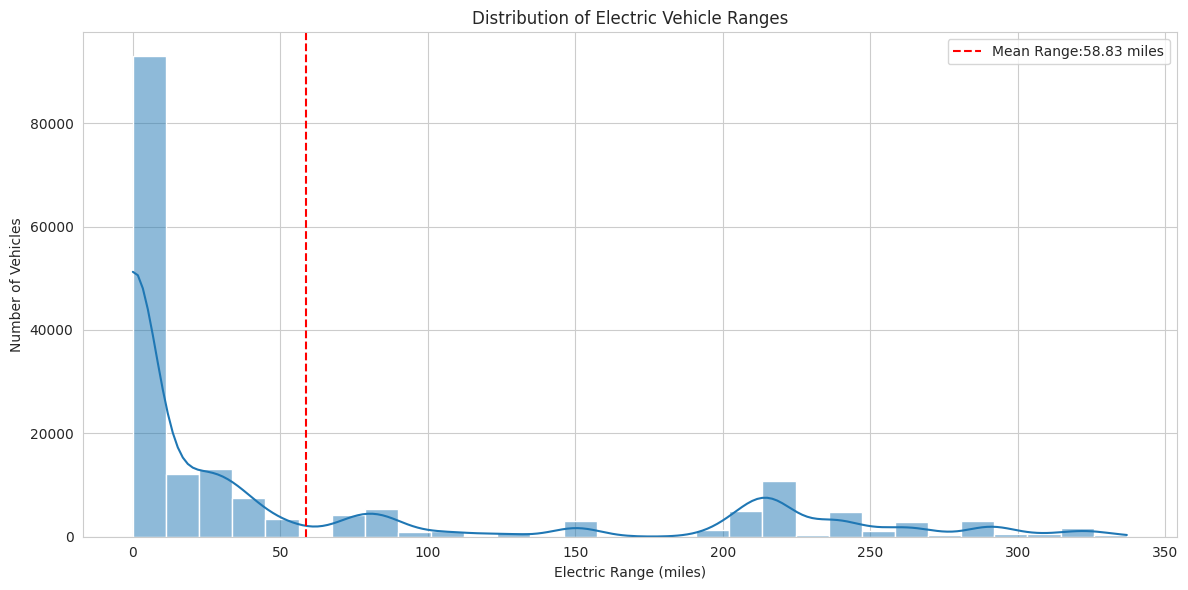

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True)
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label = f'Mean Range:{ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
avg_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()
avg_range_by_year

,Model Year,Electric Range
0,1997,39.000000
1,1998,58.000000
2,1999,74.000000
3,2000,58.000000
4,2002,95.000000
5,2003,95.000000
6,2008,220.000000
7,2010,226.086957
8,2011,70.891613
9,2012,61.172243


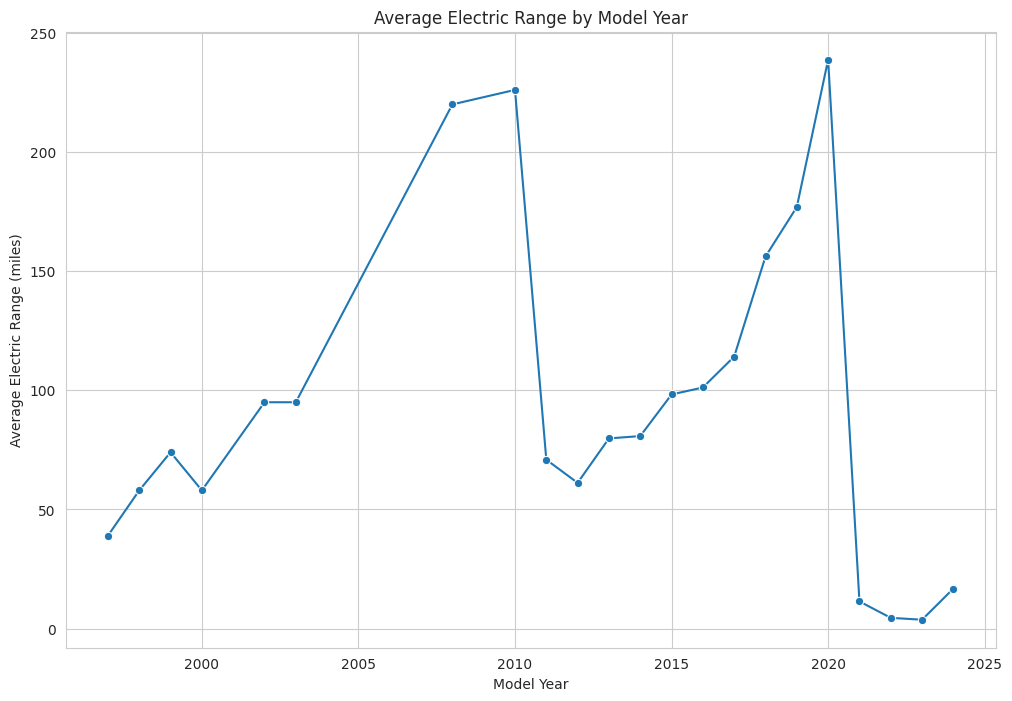

In [26]:
plt.figure(figsize=(12,8))
sns.lineplot(data=avg_range_by_year,x='Model Year',y='Electric Range',marker='o')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

In [27]:
avg_range_by_model = ev_data.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
# avg_range_by_model
top_model_ranges = avg_range_by_model.head(10)
top_model_ranges

,Make,Model,Electric Range
0,HYUNDAI,KONA,258.000000
1,TESLA,ROADSTER,234.673913
2,JAGUAR,I-PACE,203.741379
3,TESLA,MODEL S,176.794449
4,CHEVROLET,BOLT EV,154.857143
5,TESLA,MODEL X,137.192600
6,AUDI,E-TRON,130.626838
7,TESLA,MODEL 3,109.463028
8,VOLKSWAGEN,E-GOLF,107.529577
9,TOYOTA,RAV4,102.555556


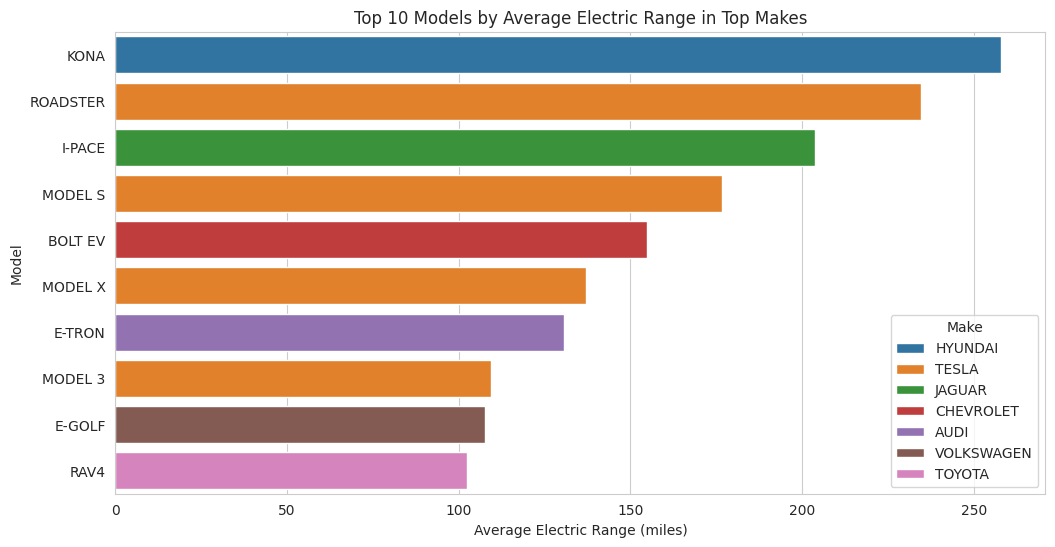

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_model_ranges, x='Electric Range',y='Model',hue='Make')
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make')
plt.show()

##Estimated Market Size

In [29]:
ev_registration_count = ev_data['Model Year'].value_counts().sort_index()
ev_registration_count

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

In [30]:
filtered_years = ev_registration_count[ev_registration_count.index <=2023]

In [31]:
def exp_growth(x,a,b):
  return a * np.exp(b * x)

In [32]:
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

In [33]:
params, covariance = curve_fit(exp_growth,x_data,y_data)

In [37]:
forcast_years = np.arange(2024,2030) - filtered_years.index.min()
forcasted_values = exp_growth(forcast_years,*params)
forcasted_values

array([ 79079.20666115, 119653.95934091, 181047.21317329, 273940.73358179,
       414496.99335333, 627171.268955  ])

In [48]:
forcasted_years = np.arange(2024,2030)

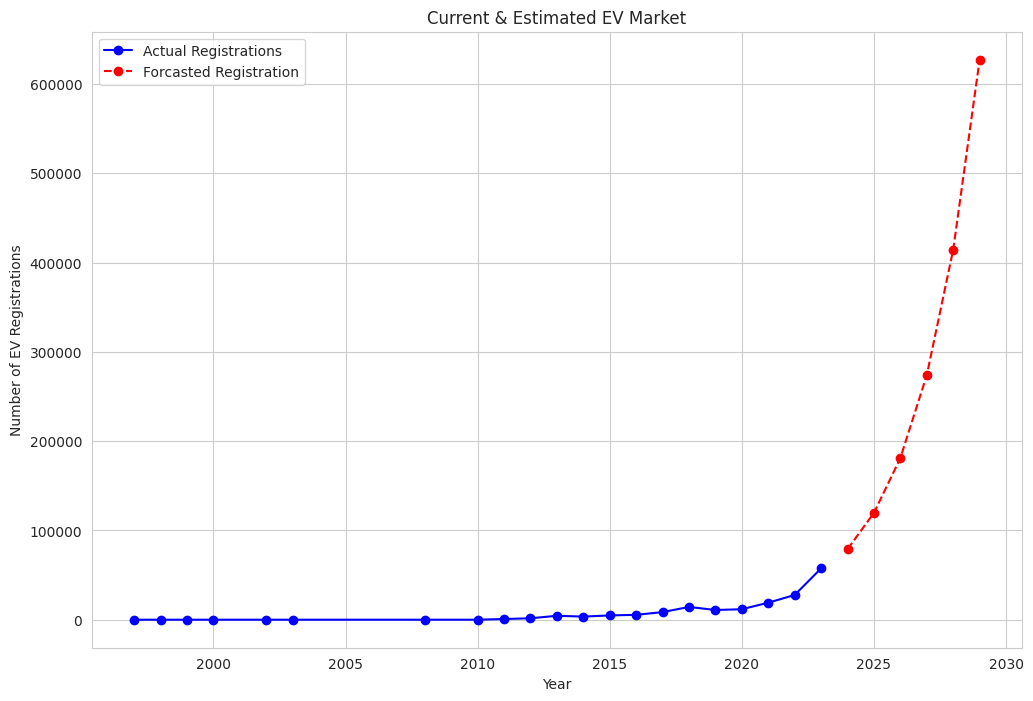

In [51]:
plt.figure(figsize=(12,8))
plt.plot(filtered_years.index,filtered_years.values, 'bo-', label = 'Actual Registrations')
plt.plot(forcasted_years, forcasted_values, 'ro--', label = 'Forcasted Registration')
plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.show()